References

1.https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2

2.https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd


## to print histograms

def print_histogram(hist,name):
  plt.plot(hist,color='purple')
  plt.bar(np.arange(len(hist)),hist,color="orange")
  plt.ylabel('Number of Pixels')
  plt.xlabel('Intensity')
  plt.title(name)
  plt.show()
  return

## to generate a histogram for an image

def histogram(image,name,show):
  hist=np.zeros([256])

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      intensity=int(image[x,y])
      hist[intensity]+=1

  hist=hist/(image.shape[0]*image.shape[1])

  if(show):
    print_histogram(hist,name)
  return(hist)

## to equalize a histogram and generate an enhanced image

def equalizing_hist(image,hist,name,show):
  eq_histogram=np.zeros_like(hist)
  enhanced_image=np.zeros_like(image)

  for i in range(len(hist)):
    eq_histogram[i]=int(np.sum(hist[:i+1])*255)

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      intensity=int(image[x,y])
      enhanced_image[x,y]=eq_histogram[intensity]

  fig,axes=plt.subplots(1,2)
  axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')
  axes[0].set_xticks([])
  axes[0].set_yticks([])

  axes[1].set_xticks([])
  axes[1].set_yticks([])
  axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
  axes[1].set_title('Enhanced Image')
  plt.tight_layout()
  plt.show()
  print()

  if(show):
    print_histogram(eq_histogram, name)
  return(eq_histogram, enhanced_image)


## to map each pixel of input image to the target image

def searching_target(hist,value):
  k=np.where(hist==value)

  if len(k[0])== 0:
    k=searching_target(hist,value+1)
    if len(k[0])== 0:
      k=searching_target(hist,value-1)

  return k


def matching_histogram(input_im , input_hist ,target_hist ,name):
  output_img=np.zeros_like(input_im)
  matching=np.zeros_like(input_hist)


  for i in range(len(input_hist)):
    matching[i]=searching_target(target_hist,input_hist[i])[0][0]


  for x in range(input_im.shape[0]):
    for y in range(input_im.shape[1]):
      intensity=int(input_im[x,y])
      output_img[x,y]=matching[intensity]

  plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
  plt.title('Matched Image')
  plt.axis('off')
  plt.show()
  print()

  output_hist=histogram(output_img, name, 1)

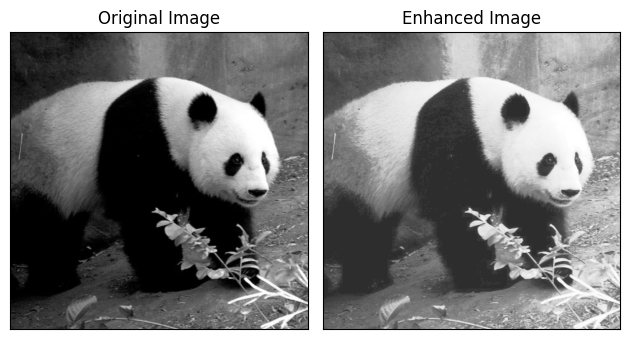

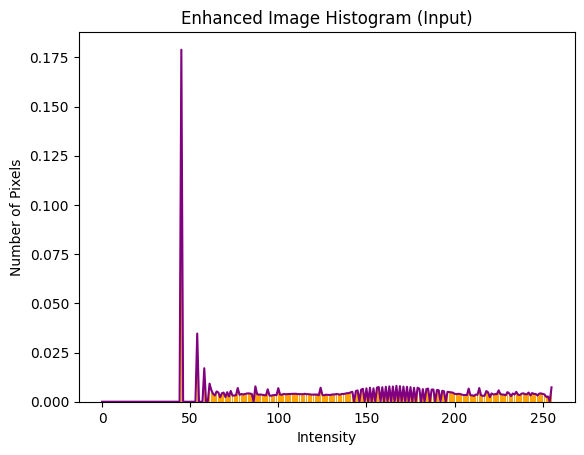

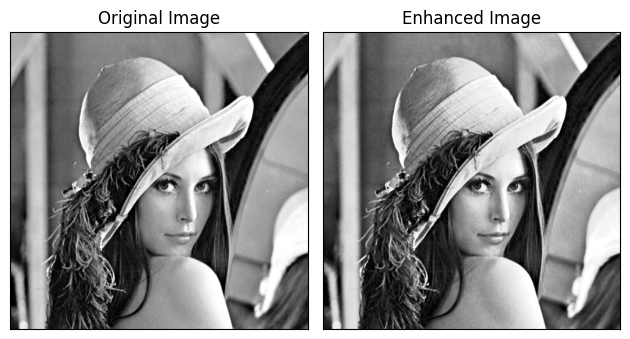

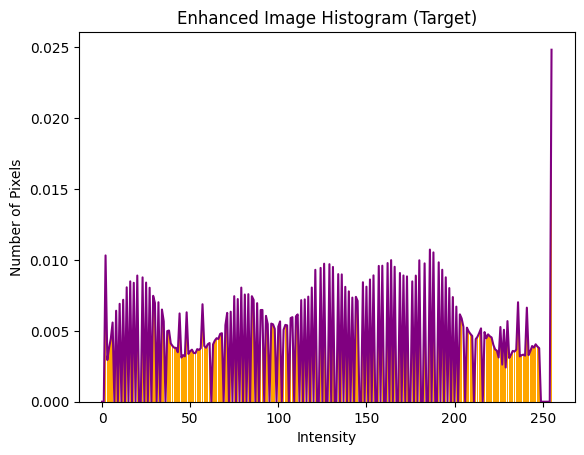

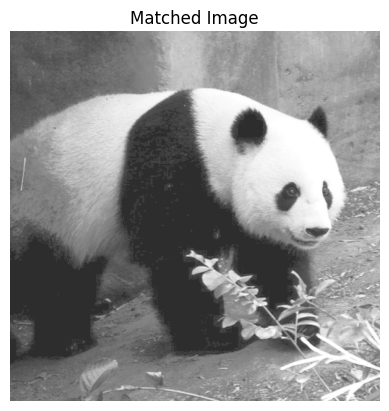

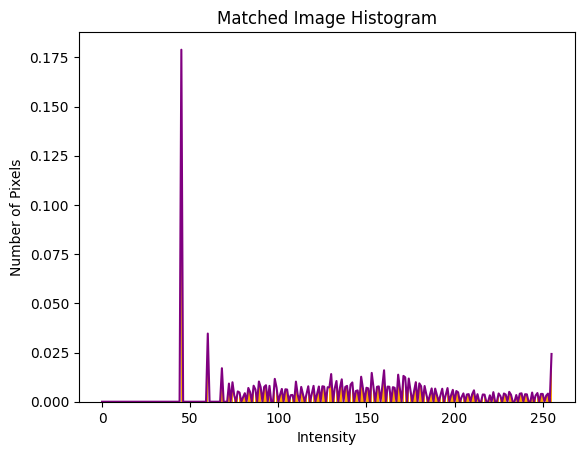

In [ ]:
##1

sourceimg1=cv2.imread('/content/grey_1.png',0)
sourceimg1_hist=histogram(sourceimg1, 'Input Image Histogram', 0)
equalized_hist1, enhanced_img1=equalizing_hist(sourceimg1, sourceimg1_hist, 'Equalized Histogram (Input)', 0)
enhanced_img1_hist=histogram(enhanced_img1, 'Enhanced Image Histogram (Input)', 1)

targetimg2=cv2.imread('/content/grey_2.png',0)
targetimg2_hist=histogram(targetimg2, 'Target Image Histogram (Target)', 0)
equalized_hist2, enhanced_img2=equalizing_hist(targetimg2, targetimg2_hist, 'Equalized Histogram (Target)', 0)
enhanced_img2_hist=histogram(enhanced_img2, 'Enhanced Image Histogram (Target)', 1)

matching_histogram(sourceimg1, equalized_hist1, equalized_hist2 , 'Matched Image Histogram')

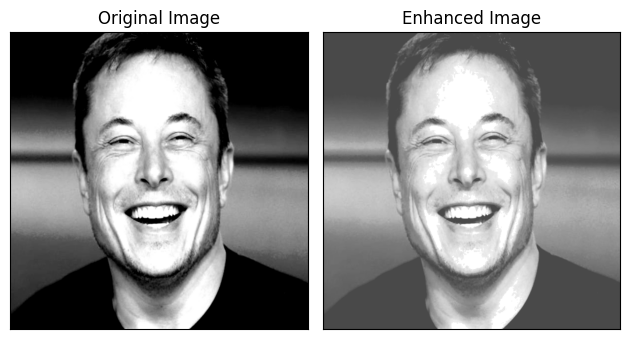

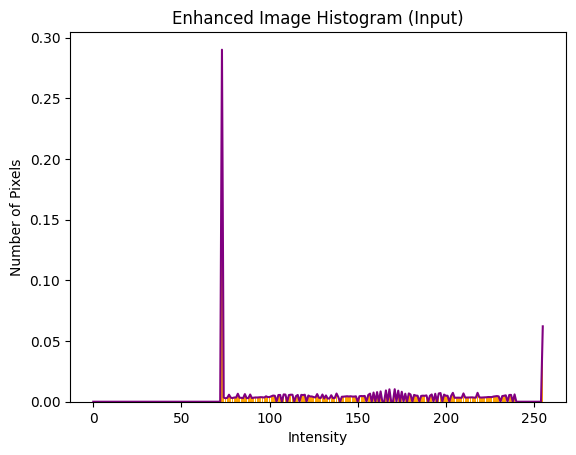

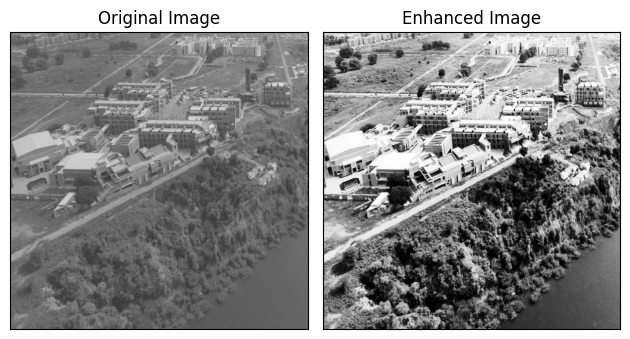

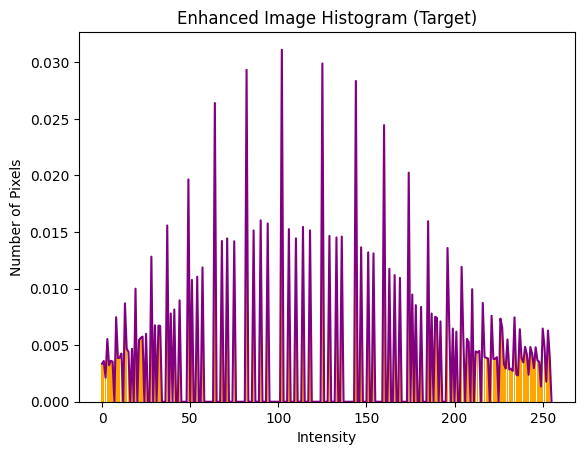

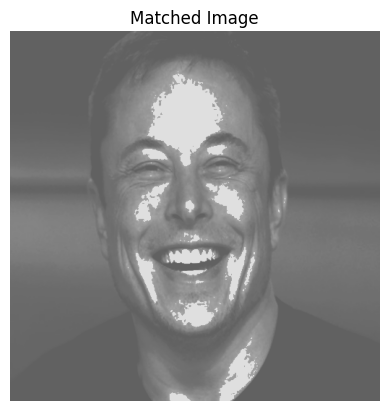

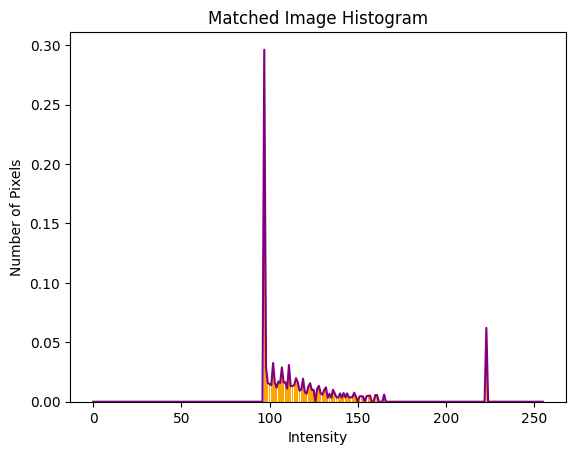

In [ ]:
##2

sourceimg1=cv2.imread('/content/grey_4.png',0)
sourceimg1_hist=histogram(sourceimg1, 'Input Image Histogram', 0)
equalized_hist1, enhanced_img1=equalizing_hist(sourceimg1, sourceimg1_hist, 'Equalized Histogram (Input)', 0)
enhanced_img1_hist=histogram(enhanced_img1, 'Enhanced Image Histogram (Input)', 1)

targetimg2=cv2.imread('/content/grey_3.png',0)
targetimg2_hist=histogram(targetimg2, 'Target Image Histogram (Target)', 0)
equalized_hist2, enhanced_img2=equalizing_hist(targetimg2, targetimg2_hist, 'Equalized Histogram (Target)', 0)
enhanced_img2_hist=histogram(enhanced_img2, 'Enhanced Image Histogram (Target)', 1)

matching_histogram(sourceimg1, equalized_hist1, equalized_hist2 , 'Matched Image Histogram')

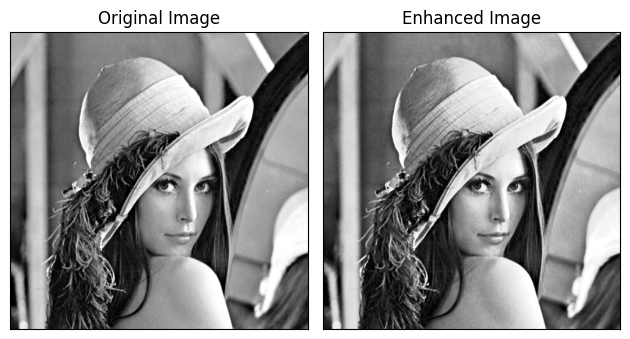

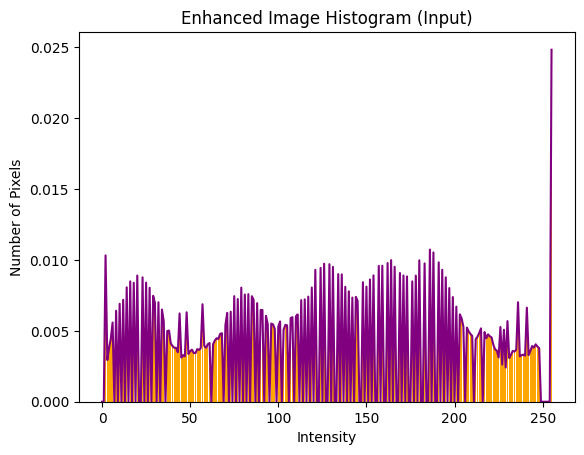

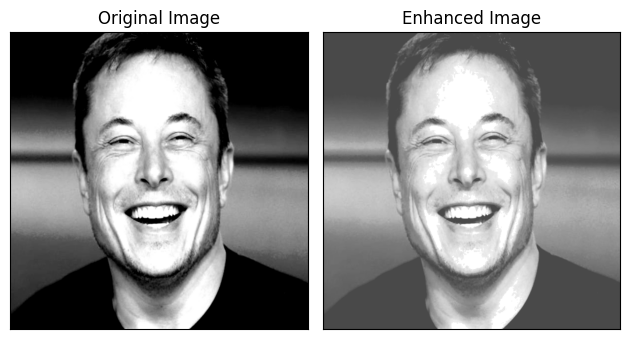

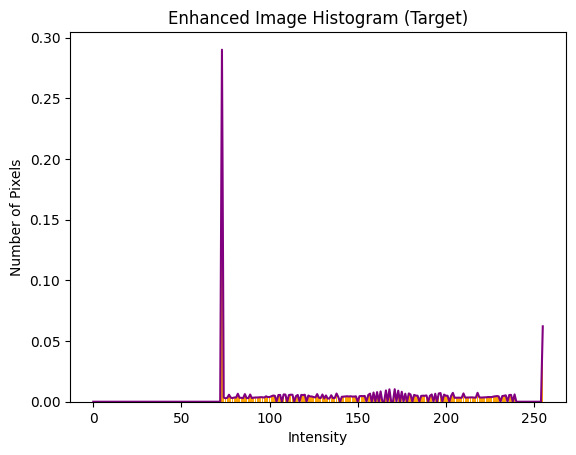

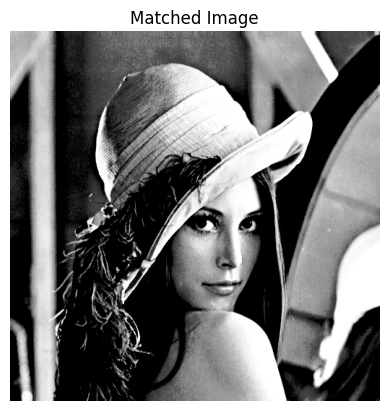

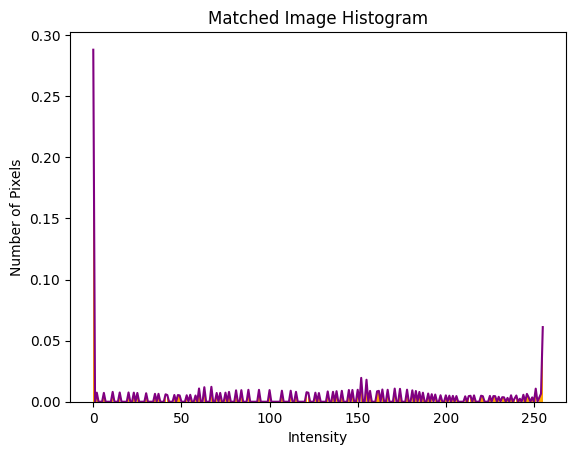

In [ ]:
##3

sourceimg1=cv2.imread('/content/grey_2.png',0)
sourceimg1_hist=histogram(sourceimg1, 'Input Image Histogram', 0)
equalized_hist1, enhanced_img1=equalizing_hist(sourceimg1, sourceimg1_hist, 'Equalized Histogram (Input)', 0)
enhanced_img1_hist=histogram(enhanced_img1, 'Enhanced Image Histogram (Input)', 1)

targetimg2=cv2.imread('/content/grey_4.png',0)
targetimg2_hist=histogram(targetimg2, 'Target Image Histogram (Target)', 0)
equalized_hist2, enhanced_img2=equalizing_hist(targetimg2, targetimg2_hist, 'Equalized Histogram (Target)', 0)
enhanced_img2_hist=histogram(enhanced_img2, 'Enhanced Image Histogram (Target)', 1)

matching_histogram(sourceimg1, equalized_hist1, equalized_hist2 , 'Matched Image Histogram')

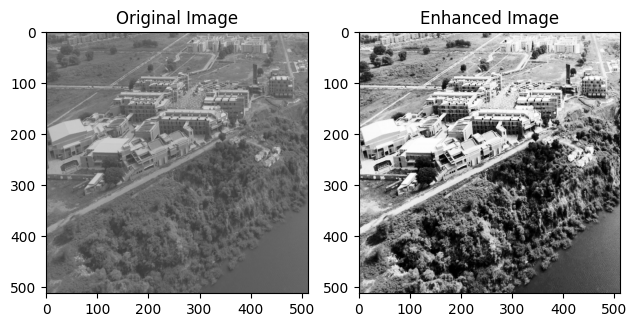

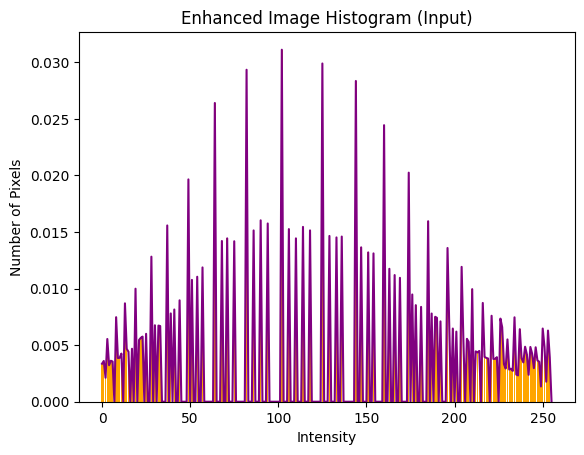

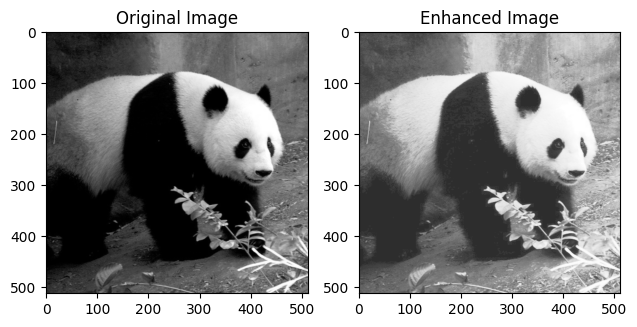

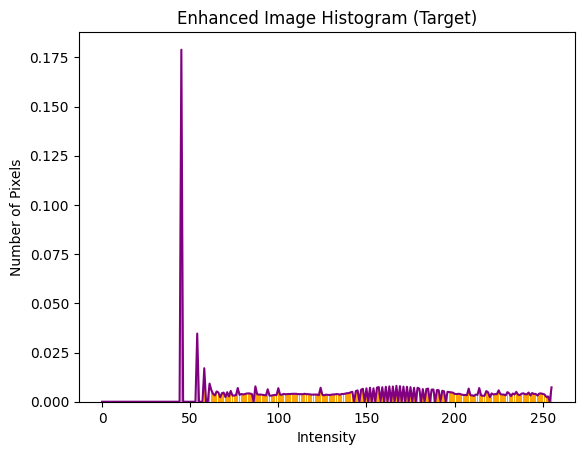

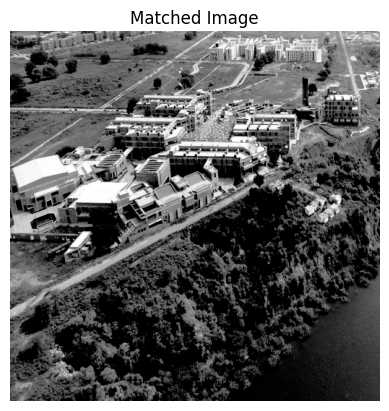

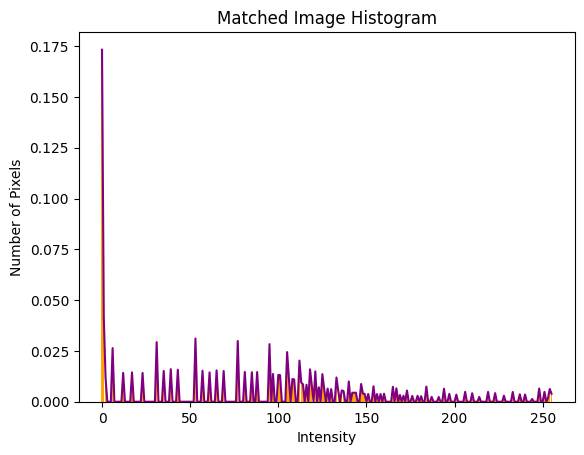

In [ ]:
##4

sourceimg1=cv2.imread('/content/grey_3.png',0)
sourceimg1_hist=histogram(sourceimg1, 'Input Image Histogram', 0)
equalized_hist1, enhanced_img1=equalizing_hist(sourceimg1, sourceimg1_hist, 'Equalized Histogram (Input)', 0)
enhanced_img1_hist=histogram(enhanced_img1, 'Enhanced Image Histogram (Input)', 1)

targetimg2=cv2.imread('/content/grey_1.png',0)
targetimg2_hist=histogram(targetimg2, 'Target Image Histogram (Target)', 0)
equalized_hist2, enhanced_img2=equalizing_hist(targetimg2, targetimg2_hist, 'Equalized Histogram (Target)', 0)
enhanced_img2_hist=histogram(enhanced_img2, 'Enhanced Image Histogram (Target)', 1)

matching_histogram(sourceimg1, equalized_hist1, equalized_hist2 , 'Matched Image Histogram')